<h1><font color="#113D68" size=6>Improving Deep Learning by Exploiting Synthetic Images</font></h1>

<h1><font color="#113D68" size=5>Part 2. Vision Transformers (ViT)</font></h1>

<h1><font color="#113D68" size=4>TensorFlow</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Licencia</font></h2>

<p><small><small>Improving Deep Learning by Exploiting Synthetic Images Copyright 2024 Manuel Castillo Cara.</p>
<p><small><small> Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at </p>
<p><small><small> <a href="https://www.apache.org/licenses/LICENSE-2.0">https://www.apache.org/licenses/LICENSE-2.0</a> </p>
<p><small><small> Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License. </p>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
El código de este tutorial ha sido obtenido y modificado de François Chollet de su [GitHub](https://github.com/keras-team/keras-io/blob/master/examples/vision/image_classification_with_vision_transformer.py)

---

<a id="indice"></a>
<h2><font color="#004D7F" size=6>Índice</font></h2>

* [1. Definición, fortalezas y debilidades](#section1)
    * [1.1. Características de los Vision Transformer (ViT)](#section12)
    * [1.2. Fortalezas de los Vision Transformer (ViT)](#section12)
    * [1.3. Debilidades de los Vision Transformer (ViT)](#section13)
* [2. Dataset](#section2)
* [3. El Modelo ViT](#section3)
    * [3.1. Configurar los hiperparámetros](#section31)
    * [3.2. Data augmentation](#section32)
    * [3.3. Módulo MultiLayer Perceptrón (MLP)](#section33)
    * [3.4. Módulo Patch embedding](#section34)
    * [3.5. Módulo patch encoding](#section35)
    * [3.6. Modelo ViT](#section36)
* [4. Entrenamiento y evaluación del modelo](#section4)
    * [4.1. Entrenamiento](#section41)
    * [4.2. Resultados](#section42)
* [5. Conclusiones](#section5)
---

<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Definición, fortalezas y debilidades</font>

Los Vision Transformer (ViT) son una adaptación del modelo Transformer, originalmente diseñado para tareas de procesamiento de lenguaje natural, aplicado a tareas de visión por computadora. En lugar de procesar secuencias de palabras, los ViT dividen una imagen en **patchs** y procesan estos patchs como **secuencias de tokens**. Al hacerlo, pueden capturar dependencias globales entre los patchs de la imagen y han demostrado ser eficaces en tareas como la clasificación de imágenes, la detección de objetos y más.

<figure><center>
  <img src="../img/vit.png" width="450" height="250" alt="Gráfica">
  <figcaption><blockquote>Arquitectura de ViT y del Trasformer Encoder. Extraída de <a href="https://arxiv.org/abs/2010.11929">artículo de ViT</a></blockquote></figcaption>
</center></figure>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información se recomienda la lectura del artículo [ViT](https://arxiv.org/abs/2010.11929)

<a id="section11"></a>
# <font color="#004D7F" size=5> 1.1. Características de los Vision Transformer (ViT)</font>

1. **División de imágenes en patchs**: ViT divide una imagen en múltiples patchs y los procesa como secuencias de tokens, lo que permite capturar dependencias globales entre los patchs.
2. **Uso de Transformers**: ViT utiliza el modelo Transformers, que se basa en la atención para procesar secuencias de entrada, en lugar de las redes neuronales convolucionales (CNN) tradicionales utilizadas en la visión por computadora.
3. **Preentrenamiento en grandes conjuntos de datos**: ViT se preentrena en grandes conjuntos de datos de imágenes, como ImageNet, lo que mejora su rendimiento en tareas posteriores de clasificación de imágenes.

<a id="section12"></a>
# <font color="#004D7F" size=5> 1.2. Fortalezas de los Vision Transformer (ViT)</font>

1. **Captura de dependencias globales**: Al dividir las imágenes en patchs y procesarlos como secuencias de tokens, ViT puede capturar dependencias globales entre los patchs de la imagen, lo que resulta en una mejor comprensión del contexto y la semántica de la imagen.
2. **Mejora del rendimiento en tareas de clasificación de imágenes**: ViT ha demostrado ser eficaz en tareas de clasificación de imágenes, superando a las redes neuronales convolucionales (CNN) tradicionales en algunos casos.
3. **Escalabilidad**: ViT puede escalarse fácilmente a conjuntos de datos más grandes y a tareas más complejas, lo que lo hace adecuado para su uso en aplicaciones de visión por computadora a gran escala.

<a id="section13"></a>
# <font color="#004D7F" size=5> 1.3. Debilidades de los Vision Transformer (ViT)</font>

1. **Requisitos de recursos computacionales**: ViT requiere una gran cantidad de recursos computacionales para el preentrenamiento y la inferencia, lo que puede ser un desafío para su implementación en dispositivos con recursos limitados.
2. **Necesidad de grandes conjuntos de datos**: ViT requiere grandes conjuntos de datos de imágenes para el preentrenamiento, lo que puede ser un desafío para su uso en aplicaciones donde los datos de entrenamiento son escasos.
3. **Falta de interpretabilidad**: A diferencia de las redes neuronales convolucionales (CNN), ViT no proporciona una representación espacial jerárquica de la imagen, lo que dificulta la interpretación de los resultados y la extracción de características locales.

<a id="section2"></a>
# <font color="#004D7F" size=6> 2. Dataset</font>

This example implements the [Vision Transformer (ViT)](https://arxiv.org/abs/2010.11929)
model by Alexey Dosovitskiy et al. for image classification,
and demonstrates it on the CIFAR-100 dataset.
The ViT model applies the Transformer architecture with self-attention to sequences of
image patches, without using convolution layers.

Se necesita Keras v3.0 para poder utilizar `ops` de Keras

In [3]:
pip install keras-nightly

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import random
import torch
import tensorflow as tf
import keras
from keras import layers
from keras import ops
import numpy as np
import matplotlib.pyplot as plt
os.environ["KERAS_BACKEND"] = "jax"  # @param ["tensorflow", "jax", "torch"]

# SET RANDOM SEED FOR REPRODUCIBILITY
SEED = 420
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
#torch.backends.cudnn.deterministic = True
#torch.backends.cudnn.benchmark = False
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

/Users/manwest/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
num_classes = 100
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")


x_train shape: (50000, 32, 32, 3) - y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3) - y_test shape: (10000, 1)


<a id="section3"></a>
# <font color="#004D7F" size=6> 3. El Modelo ViT</font>

<figure><center>
  <img src="../img/procedimiento.png" width="450" height="850" alt="Gráfica">
  <figcaption><blockquote>Flujo de análisis de la imagen in ViT. Extraída de <a href="https://dkamatblog.home.blog/2021/08/05/vision-transformers-vit/">Divya's blog</a></blockquote></figcaption>
</center></figure>

<a id="section31"></a>
# <font color="#004D7F" size=5> 3.1. Configurar los hiperparámetros</font>

Este código define los hiperparámetros para el modelo ViT implementado en TensorFlow y Keras. Los hiperparámetros son los siguientes:

* `learning_rate`: tasa de aprendizaje para el optimizador.
* `weight_decay`: valor de decaimiento de peso para regularización L2.
* `batch_size`: tamaño del lote de entrenamiento.
* `num_epochs`: número de épocas de entrenamiento.
* `image_size`: tamaño de las imágenes de entrada.
* `patch_size`: tamaño de los parches extraídos de las imágenes.
* `num_patches`: número total de parches extraídos de cada imagen.
* `projection_dim`: dimensión de la proyección lineal para los parches.
* `num_heads`: número de cabezas de atención en el transformador.
* `transformer_units`: lista de unidades en las capas del transformador.
* `transformer_layers`: número de capas en el transformador.
* `mlp_head_units`: lista de unidades en las capas densas del clasificador final.

Estos hiperparámetros se utilizan para configurar el modelo ViT y su proceso de entrenamiento.

In [3]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 10  # For real training, use num_epochs=100. 10 is a test value
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [
    2048,
    1024,
]  # Size of the dense layers of the final classifier

<a id="section32"></a>
# <font color="#004D7F" size=5> 3.2. Data augmentation</font>

Este código define una serie de transformaciones de aumento de datos (data augmentation) que se aplicarán a las imágenes de entrenamiento antes de ser pasadas al modelo. Estas transformaciones incluyen:
* `layers.Normalization()`: normaliza los valores de los píxeles de las imágenes.
* `layers.Resizing(image_size, image_size)`: redimensiona las imágenes al tamaño especificado en `image_size`.
* `layers.RandomFlip("horizontal")`: aplica un volteo horizontal aleatorio a las imágenes.
* `layers.RandomRotation(factor=0.02)`: aplica una rotación aleatoria de hasta 2 grados a las imágenes.
* `layers.RandomZoom(height_factor=0.2, width_factor=0.2)`: aplica un zoom aleatorio de hasta el 20% en altura y anchura a las imágenes.

Las transformaciones de aumento de datos se aplican mediante la creación de un modelo secuencial de Keras (`keras.Sequential`) que contiene las capas de transformación definidas anteriormente. Este modelo secuencial se almacena en la variable `data_augmentation`.

Finalmente, se calcula la media y la varianza de las imágenes de entrenamiento para la normalización aplicando el método `adapt()` de la capa de normalización (`data_augmentation.layers[0].adapt(x_train)`). Esto permite que la capa de normalización aprenda los parámetros de normalización adecuados para las imágenes de entrenamiento.

In [4]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

2024-05-09 10:25:05.479832: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-05-09 10:25:05.479858: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-05-09 10:25:05.479864: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-05-09 10:25:05.479912: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-09 10:25:05.479928: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<a id="section33"></a>
# <font color="#004D7F" size=5> 3.3. Módulo MultiLayer Perceptrón (MLP)</font>

Esta función se utiliza en la implementación del clasificador final del modelo ViT. Este código define una función `mlp` que crea una red neuronal multicapa (MLP) utilizando las capas `Dense` y `Dropout` de Keras. La función toma tres argumentos:

* `x`: la entrada de la MLP.
* `hidden_units`: una lista de unidades ocultas para cada capa de la MLP.
* `dropout_rate`: la tasa de dropout para aplicar a cada capa de la MLP.

La función aplica una serie de capas densas con la función de activación GELU y dropout a la entrada `x`. La salida de cada capa se utiliza como entrada para la siguiente capa. Finalmente, la función devuelve la salida de la última capa densa.

In [5]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


<a id="section34"></a>
# <font color="#004D7F" size=5> 3.4. Módulo Patch embedding</font>


Esta clase define la capa `Patches`, que divide una imagen en parches y los aplana en una sola dimensión. La clase toma un argumento `patch_size` que define el tamaño del parche.

* El método `call` de la clase toma una entrada de imágenes y devuelve una salida de parches aplanados. 
    1. Primero, se extrae la forma de la entrada y se calcula el número de parches en la dimensión de altura y anchura. 
    2. Luego, se utiliza la función `extract_patches` de Keras para extraer los parches de la imagen. 
    3. Finalmente, se aplana cada parche en una sola dimensión y se devuelve la salida.
* El método `get_config` se utiliza para guardar y cargar la configuración de la capa en un archivo de configuración. 
    - Se utiliza la función `super().get_config()` para obtener la configuración de la clase base y se actualiza con el tamaño del parche.

<figure><center>
  <img src="../img/patch_embedding.png" width="900" height="200" alt="Gráfica">

  <figcaption><blockquote>Arquitectura de ViT - Patch embedding. Extraída de <a href="https://arxiv.org/abs/2010.11929">Aman Arora's Blog</a></blockquote></figcaption>
</center></figure>

In [6]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config


Veamos un ejemplo de como quedaría una imagen y la división según los patchs

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


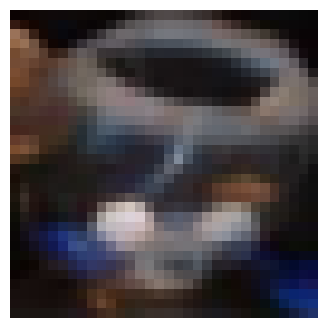

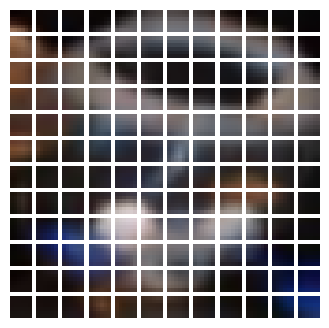

In [7]:
plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = ops.image.resize(
    ops.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = ops.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(ops.convert_to_numpy(patch_img).astype("uint8"))
    plt.axis("off")

<a id="section35"></a>
# <font color="#004D7F" size=5> 3.5. Módulo patch encoding</font>


La capa `PatchEncoder` transformará linealmente un parche al proyectarlo en un vector de tamaño `projection_dim`. Además, agrega una incrustación de posición aprendible al vector proyectado.

La clase `PatchEncoder` es una capa personalizada que toma los parches de la imagen como entrada y los codifica en vectores de una dimensión fija.

En el constructor de la clase, se definen dos capas:

* `projection`: una capa densa que proyecta cada parche a la dimensión deseada (`projection_dim`).
* `position_embedding`: una capa de incrustación (embedding) que asigna una representación única a cada posición de parche en la imagen.

El método `call` de la clase toma una entrada de parches y devuelve los parches codificados. 
1. Primero, se crea un tensor de posiciones utilizando la función `arange` de TensorFlow y se expande su dimensión para que coincida con la forma de la entrada.
2. Luego, se aplica la capa densa de proyección a los parches y se suma la incrustación de posición a los parches proyectados. 
3. Finalmente, se devuelven los parches codificados.

El método `get_config` se utiliza para guardar y cargar la configuración de la capa en un archivo de configuración. Se utiliza la función `super().get_config()` para obtener la configuración de la clase base y se actualiza con el número de parches.

In [8]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config


<a id="section35"></a>
# <font color="#004D7F" size=5> 3.6. Modelo ViT</font>


El modelo ViT consta de varios bloques de Transformer, que utilizan la capa `layers.MultiHeadAttention` como un mecanismo de atención autoaplicado a la secuencia de parches. Los bloques de Transformer producen un tensor `[batch_size, num_patches, projection_dim]`, que se procesa a través de una cabeza de clasificador con softmax para producir la salida final de probabilidades de clase.

A diferencia de la técnica descrita en el [artículo](https://arxiv.org/abs/2010.11929), que agrega una incrustación aprendible a la secuencia de parches codificados para servir como la representación de la imagen, todas las salidas del bloque final de Transformer se reorganizan con `layers.Flatten()` y se utilizan como la entrada de representación de imagen a la cabeza de clasificador. Tenga en cuenta que la capa `layers.GlobalAveragePooling1D` también se podría utilizar en su lugar para agregar las salidas del bloque de Transformer, especialmente cuando el número de parches y las dimensiones de proyección son grandes.


1. Este código define la función `create_vit_classifier()` que crea el modelo ViT (Vision Transformer) para la clasificación de imágenes.
2. La función comienza definiendo la entrada del modelo con la forma `input_shape` utilizando `keras.Input()`. 
3. Luego, se aplica la transformación de aumento de datos definida anteriormente mediante `data_augmentation()`.
4. A continuación, se crea la capa `Patches` para dividir la imagen en parches y aplanarlos en una sola dimensión. 
5. Luego, se utiliza la capa `PatchEncoder` para proyectar los parches a una dimensión más pequeña y agregar una incrustación de posición a cada parche.
6. Después de eso, se crea un bucle `for` para apilar varias capas de bloques de transformador. 
    - Cada bloque de transformador consta de dos capas de normalización, una capa de atención múltiple y una red neuronal multicapa (MLP). 
    - La salida de cada bloque de transformador se suma a su entrada mediante una conexión residual.
7. Finalmente, se aplana la representación de los parches codificados y se aplica una capa de dropout y una MLP adicional antes de la capa de salida densa que clasifica las imágenes en las clases deseadas.
8. La función devuelve el modelo de Keras compilado con la entrada y salida definidas.

In [9]:

def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


<a id="section4"></a>
# <font color="#004D7F" size=6> 4. Entrenamiento y evaluación del modelo</font>

<a id="section41"></a>
# <font color="#004D7F" size=5> 4.1. Entrenamiento</font>

Este código define la función `run_experiment` que entrena y evalúa el modelo ViT. La función toma como entrada el modelo `model` y realiza los siguientes pasos:

1. Define el optimizador `AdamW` con una tasa de aprendizaje y decaimiento de peso especificadas.
2. Compila el modelo con el optimizador definido, la función de pérdida `SparseCategoricalCrossentropy` y las métricas de precisión y precisión top-5.
3. Define un callback de punto de control que guarda los pesos del modelo con la mayor precisión de validación.
4. Entrena el modelo utilizando los datos de entrenamiento `x_train` e `y_train` con un tamaño de lote y número de épocas especificados, y utiliza el 10% de los datos de entrenamiento para validación.
5. Carga los pesos del modelo guardados en el punto de control.
6. Evalúa el modelo utilizando los datos de prueba `x_test` e `y_test` y imprime la precisión y precisión top-5 de la prueba.
7. Devuelve el historial de entrenamiento.

Luego, se crea el modelo ViT utilizando la función `create_vit_classifier()` y se entrena y evalúa utilizando la función `run_experiment()`. El historial de entrenamiento se devuelve y se almacena en la variable `history`.

In [10]:
def run_experiment(model):
    optimizer = keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint.weights.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/10


2024-05-09 10:25:25.714983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


176/176 ━━━━━━━━━━━━━━━━━━━━ 150s 762ms/step - accuracy: 0.0289 - loss: 4.9001 - top-5-accuracy: 0.1111 - val_accuracy: 0.1026 - val_loss: 3.9120 - val_top-5-accuracy: 0.3284
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 124s 704ms/step - accuracy: 0.0810 - loss: 4.0438 - top-5-accuracy: 0.2595 - val_accuracy: 0.1578 - val_loss: 3.5676 - val_top-5-accuracy: 0.4098
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 130s 738ms/step - accuracy: 0.1201 - loss: 3.7586 - top-5-accuracy: 0.3477 - val_accuracy: 0.1864 - val_loss: 3.3872 - val_top-5-accuracy: 0.4586
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 127s 720ms/step - accuracy: 0.1493 - loss: 3.5684 - top-5-accuracy: 0.3999 - val_accuracy: 0.2064 - val_loss: 3.3057 - val_top-5-accuracy: 0.4842
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 132s 749ms/step - accuracy: 0.1727 - loss: 3.4324 - top-5-accuracy: 0.4442 - val_accuracy: 0.2424 - val_loss: 3.0892 - val_top-5-accuracy: 0.5362
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 127s 721ms/step - accuracy: 0.1976 - loss

En este código se crea una instancia del modelo `Model` definido anteriormente y se llama al método `forward` del modelo utilizando el lote de imágenes `imgs` como entrada. La salida del modelo se almacena en la variable `out`.

La forma de la salida `out` dependerá del número de clases de salida especificado en la inicialización del modelo `ViT` dentro de la clase `Model`. En este caso, como se especificó `n_classes=10` en la inicialización del modelo `ViT`, la salida `out` tendrá una forma de `(batch_size, 10)`, donde `batch_size` es el número de imágenes en el lote de entrada. Cada fila de la salida `out` corresponderá a la salida del modelo para una de las imágenes en el lote de entrada, y contendrá las probabilidades predichas para cada una de las 10 clases de salida.

<a id="section42"></a>
# <font color="#004D7F" size=5> 4.2. Resultados</font>

La función `plot_history` toma un argumento `item` que representa la métrica que se desea visualizar, como la pérdida o la precisión. La función utiliza la biblioteca Matplotlib para crear un gráfico que muestra cómo la métrica cambia a lo largo de los epochs para el conjunto de entrenamiento y validación.

La función primero llama a `plt.plot` dos veces, una para la métrica del conjunto de entrenamiento y otra para la métrica del conjunto de validación. Luego, se establecen las etiquetas del eje x y y, así como el título del gráfico. Finalmente, se llama a `plt.legend` para mostrar una leyenda que indica qué línea corresponde a cada conjunto de datos, y `plt.grid` para mostrar una cuadrícula en el gráfico.

La función `plot_history` se llama dos veces, una para visualizar la pérdida y otra para visualizar la precisión top-5. Los gráficos resultantes muestran cómo la pérdida y la precisión cambian a lo largo de los epochs para el conjunto de entrenamiento y validación, lo que puede ser útil para evaluar el rendimiento del modelo y detectar problemas como el sobreajuste.

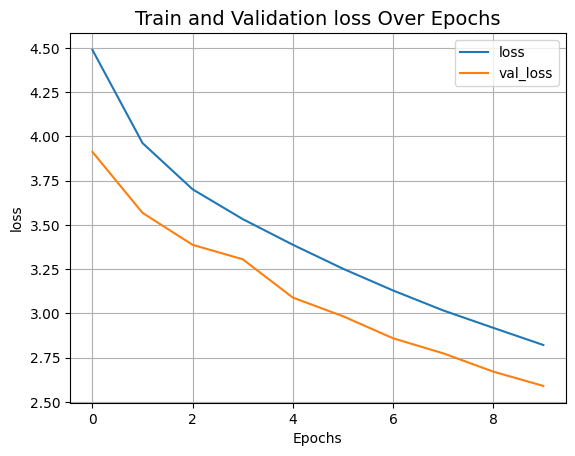

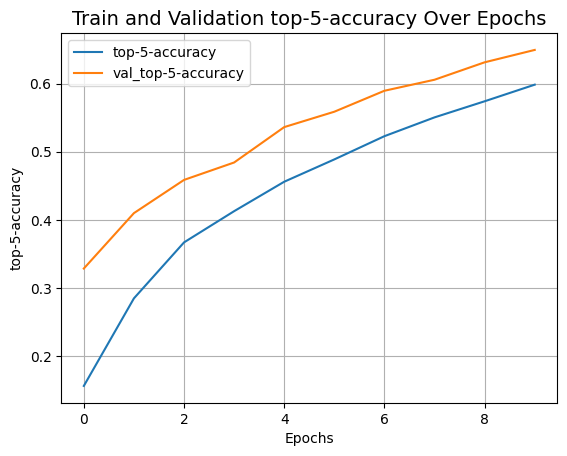

In [11]:
def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

plot_history("loss")
plot_history("top-5-accuracy")

<a id="section5"></a>
# <font color="#004D7F" size=6> 5. Conclusiones</font>

Después de 100 épocas, el modelo ViT logra alrededor del 55% de accuracy y del 82% de accuracy en los 5 primeros puestos en los datos de prueba. Estos no son resultados competitivos en el conjunto de datos CIFAR-100, ya que un ResNet50V2 entrenado desde cero en los mismos datos puede lograr una precisión del 67%.

Tenga en cuenta que los resultados de vanguardia informados en el [artículo](https://arxiv.org/abs/2010.11929) se logran preentrenando el modelo ViT usando el conjunto de datos JFT-300M, luego ajustándolo en el conjunto de datos objetivo. Para mejorar la calidad del modelo sin preentrenamiento, puedes intentar entrenar el modelo durante más épocas, usar un número más grande de capas de Transformer, cambiar el tamaño de las imágenes de entrada, cambiar el tamaño del parche o aumentar las dimensiones de proyección. Además, como se menciona en el artículo, la calidad del modelo se ve afectada no solo por las elecciones de arquitectura, sino también por parámetros como el programa de tasa de aprendizaje, el optimizador, la descomposición de peso, etc. En la práctica, se recomienda ajustar un modelo ViT que se haya preentrenado usando un conjunto de datos grande y de alta resolución.